 <h1 align="center" style="color:Orange">
    Обробка та аналіз БМД.<br>
    Группа: БС-83<br>
    Шарган П.М.<br>
    Практикум Номер 5
</h1>

In [64]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


<p style="font-size:150%">
    1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.
</p>

In [65]:
database = pd.read_csv("HappinessAlcoholConsumption.csv")
database

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [66]:
q1 = database['Spirit_PerCapita'].quantile([.2,.4,.6,.8]).iloc[0]
q2 = database['Spirit_PerCapita'].quantile([.2,.4,.6,.8]).iloc[1]
q3 = database['Spirit_PerCapita'].quantile([.2,.4,.6,.8]).iloc[2]
q4 = database['Spirit_PerCapita'].quantile([.2,.4,.6,.8]).iloc[3]

In [67]:
Spirit_Rank = []
for val in database['Spirit_PerCapita']:
    to_append = 1
    if val>q1:
        to_append = 2
    if val>q2:
        to_append = 3
    if val>q3:
        to_append = 4
    if val>q4:
        to_append = 5
    Spirit_Rank.append(to_append)
database['Spirit_Rank'] = Spirit_Rank

In [68]:
database

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Spirit_Rank
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,3
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,3
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,2
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,3
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,4
...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2,4
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13,1
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19,1


In [70]:
happiness_median = database['HappinessScore'].median()
database['IsHappy'] = ['Happy' if x > happiness_median else 'Unhappy' for x in database['HappinessScore']]

In [71]:

data = pd.DataFrame({
    'Spirit_Rank':database['Spirit_Rank'],      #Споживання алкоголя у будні. Градація іде по значенням 1 - дуже низьке,..., 5-дуже високе
    'IsHappy':database['IsHappy'] #Статус спільного сімейного проживання. {T - вместе, A - раздельно}
})

data

,Spirit_Rank,IsHappy
0,3,Happy
1,3,Happy
2,2,Happy
3,3,Happy
4,4,Happy
...,...,...
117,1,Unhappy
118,4,Unhappy
119,1,Unhappy
120,1,Unhappy


<p style="font-size:150%">
    2. Побудувати графік, що відображає розподіл ознак в групах.
</p>

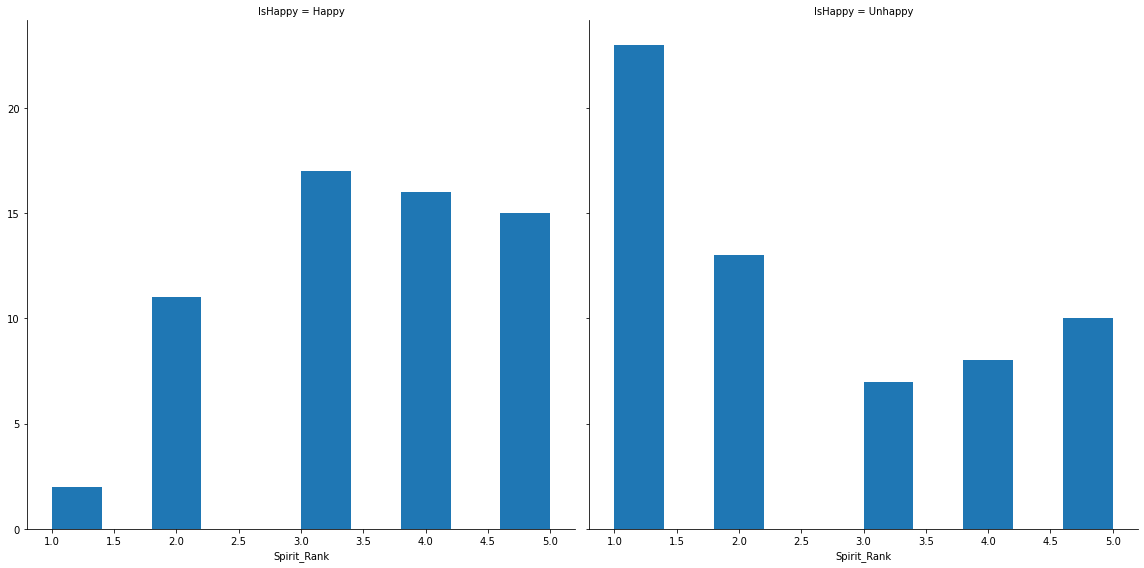

In [72]:
g = sns.FacetGrid(data, col="IsHappy", height= 8)
g = g.map(plt.hist, "Spirit_Rank");

<p style="font-size:150%">
   3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї.
</p>

In [73]:
def pirson_criterion(data,significant_level):
    print("-"*40)
    print("Робота функції")
    uniq1 = []           #Градация признака
    for i in data.iloc[:,0]:
        bl = True
        for j in uniq1:
            if(i == j):
                bl = False
        if(bl):
            uniq1.append(i)
            
    uniq2 = []           #Группы
    for i in data.iloc[:,1]:
        bl = True
        for j in uniq2:
            if(i == j):
                bl = False
        if(bl):
            uniq2.append(i)
            
    uniq1 = np.sort(uniq1)
    uniq2 = np.sort(uniq2)
    
    table_pirs = pd.DataFrame({               #Таблица частот, для заданных данных
        (uniq2[0]):[0 for i in range(len(uniq1))],
        (uniq2[1]):[0 for i in range(len(uniq1))]
    }, index = uniq1);
    
    table_pirs.index.name = data.columns[0]
    
    #print(table_pirs['no'])
    for i in range(len(data)):                #частоты совпадений группы и признака
        table_pirs[data.iloc[i,1]][data.iloc[i,0]] += 1
        
    print("Початкова таблиця спряженості:")
    print(table_pirs)
    
    if (sum(table_pirs.iloc[:,0]) != sum(table_pirs.iloc[:,1])):
        table_pirs[table_pirs.columns[1]] = [
            x/sum(table_pirs.iloc[:,1])*sum(table_pirs.iloc[:,0]) # перерасчет конкретной(x-вого рядка) частоты
            for x in table_pirs.iloc[:,1] # Проход по всем частотом группы
        ]
    table_pirs['(ni-ni`)'] = [(table_pirs.iloc[i,0] - table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
    table_pirs['(ni-ni`)^2/ni`'] = [(table_pirs.iloc[i,2]**2/table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
    print("\nКінцева таблиця спряженості:")
    print(table_pirs)
    
    chi2 =  sum(table_pirs.iloc[:,3])
    print("\nX^2(емпіричне) - " + str(chi2))
    
    r = len(table_pirs)-1
    print("ступінь свободи - " + str(r))
    
    crit_pirson = pd.read_excel("table_Pirson.xlsx").iloc[r, 1 if(significant_level == 0.01) else 2]
    print("X^2(табличне) - " + str(crit_pirson))
    print("-"*40)
    
    return "Статистична розбіжність відсутня або не суттєва %.2f(эмп)"%chi2 +" < " "%.1f(табл)"%crit_pirson  if (chi2 < crit_pirson) else"Статистичная розбіжність присутня %.2f(емп)"%chi2 +" > " "%.1f(табл)"%crit_pirson

In [74]:
print("Результат роботи - " + str(pirson_criterion(data,0.01)))

----------------------------------------
Робота функції
Початкова таблиця спряженості:
             Happy  Unhappy
Spirit_Rank                
1                2       23
2               11       13
3               17        7
4               16        8
5               15       10

Кінцева таблиця спряженості:
             Happy  Unhappy  (ni-ni`)  (ni-ni`)^2/ni`
Spirit_Rank                                          
1                2       23       -21       19.173913
2               11       13        -2        0.307692
3               17        7        10       14.285714
4               16        8         8        8.000000
5               15       10         5        2.500000

X^2(емпіричне) - 44.26731963688486
ступінь свободи - 4
X^2(табличне) - 13.3
----------------------------------------
Результат роботи - Статистичная розбіжність присутня 44.27(емп) > 13.3(табл)


<p style="font-size:150%">
   4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості.Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп.
</p>

In [77]:
table_pirs = pd.DataFrame(
    {
        'Happy': [0 for i in range(5)],
        'Unhappy': [0 for i in range(5)],
        '%Happy': [0 for i in range(5)],
        '%Unhappy': [0 for i in range(5)]
    }, index = [1,2,3,4,5])
table_pirs.index.name = "Spirit_Rank"

for i in range(len(data)):           #частоты совпадений группы и признака
    table_pirs[data['IsHappy'][i]][data['Spirit_Rank'][i]] += 1
    
for i in range(1,len(table_pirs)+1): #процентные соотношения в групах
    table_pirs.loc[i,"%Happy"] = str(round(table_pirs["Happy"][i]/sum(table_pirs["Happy"])*100,1))+ "%"
    table_pirs.loc[i,"%Unhappy"] = str(round(table_pirs["Unhappy"][i]/sum(table_pirs["Unhappy"])*100,1))+ "%"
    
table_pirs

,Happy,Unhappy,%Happy,%Unhappy
Spirit_Rank,,,,
1,2,23,3.3%,37.7%
2,11,13,18.0%,21.3%
3,17,7,27.9%,11.5%
4,16,8,26.2%,13.1%
5,15,10,24.6%,16.4%


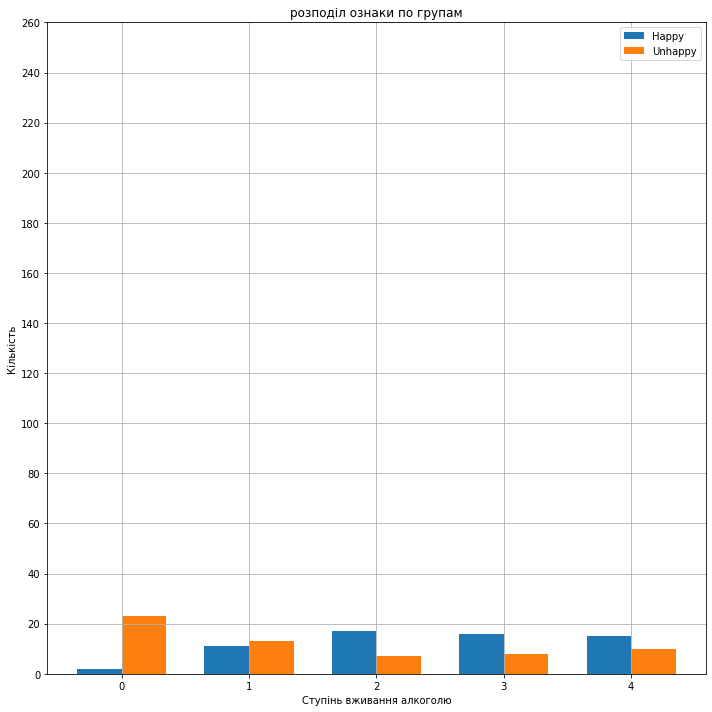

In [83]:
x = np.arange(len(table_pirs))
width = 0.35

y = [ i*10 for i in np.linspace(0,26,14)]

fig, ax = plt.subplots(figsize=(10,10))
fig.height = 10
rects1 = ax.bar(x - width/2, table_pirs["Happy"], width, label='Happy')
rects2 = ax.bar(x + width/2, table_pirs["Unhappy"], width, label='Unhappy')

ax.set_ylabel('Кількість')
ax.set_xlabel('Ступінь вживання алкоголю')
ax.set_title('розподіл ознаки по групам')
ax.set_xticks(x)
ax.set_yticks(y)

ax.legend()
ax.grid()

fig.tight_layout()

plt.show()